# How do accident stats vary across states? (in 2019)

In [169]:
import os
import requests

from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()  # Set seaborn style

load_dotenv() # Load environment variables from .env file

True

In [170]:
catalogue_path = os.getenv("data-catalogue-path")

catalogue = pd.read_excel(catalogue_path)
catalogue[['Description', 'Name']]

,Description,Name
0,NaN,cities
1,NaN,large_cities
2,NaN,rain
3,education,education
4,"financials (per capita income, gdp, etc.)",financial
5,social indicators,social
6,monthly accident data,monthly_accidents
7,hourly accident data,hourly_accidents
8,NaN,pop
9,NaN,sc_pop


In [171]:
data = {}
for index, row in catalogue.iterrows():
    data[row['Name']] = pd.read_csv(f"{row['Path']}.csv")

print("Available datasets:")
list(data.keys())

Available datasets:


['cities',
 'large_cities',
 'rain',
 'education',
 'financial',
 'social',
 'monthly_accidents',
 'hourly_accidents',
 'pop',
 'sc_pop',
 'st_pop',
 'education_enrollment']

## Accidents Data

In [172]:
y_df = data['monthly_accidents']
print("Latest year available is:", y_df['YEAR'].max())
y_df.head()

Latest year available is: 2014


,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,A & N Islands,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,A & N Islands,2005,19,21,22,17,13,19,21,14,15,19,10,16,206


In [173]:
# Filter to 2011 (as it is the census year)
y_df = y_df[y_df['YEAR'] == 2011]

# Keep only TOTAL column
y_df = y_df[['STATE/UT', 'TOTAL']]
y_df = y_df.rename(columns={'TOTAL': 'Accidents'})
y_df = y_df.sort_values(by='Accidents', ascending=False)
y_df

,STATE/UT,Accidents
430,Tamil Nadu,65873
290,Maharashtra,47120
234,Karnataka,44696
24,Andhra Pradesh,41066
248,Kerala,35216
276,Madhya Pradesh,30573
164,Gujarat,30199
458,Uttar Pradesh,24513
402,Rajasthan,23245
486,West Bengal,14468


## Socio-economic indicators

### GDP Data

Now we'll load our socio-economic indicators for states.

In [174]:
# Load financial data
financial_df = data['financial']

print("Categories:", financial_df['CATEGORY'].unique())
financial_df.head()

Categories: ['Per Capita Income' 'Gross State Domestic Product'
 'Net State Domestic Product' 'Value Added by Agriculture'
 'Value Added by Manufacturing' 'Value Added by Construction'
 'Value Added by Industry' 'Value Added by Bank' 'Value Added by Service'
 'Gross Fiscal Deficit' 'Revenue Deficit' 'Primary Deficit' 'Tax Revenue'
 'Interest Payments' 'Non Tax Revenue' 'Pension' 'Capital Expenditure'
 'Capital Outlay' 'Social Sector Expenditure']


,state,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,CATEGORY
0,Andaman & Nicobar Island,2580.0,2302.0,2884.0,15192.0,16191.0,15354.0,15896.0,16350.0,14502.0,...,98735.0,106711.0,114660.0,129532.0,145562.0,154233.0,161564.0,NaN,NaN,Per Capita Income
1,Andhra Pradesh,2060.0,2134.0,2039.0,7416.0,7711.0,8071.0,8514.0,8191.0,9144.0,...,72254.0,79174.0,88609.0,94115.0,103177.0,108853.0,115344.0,114324.0,126587.0,Per Capita Income
2,Arunachal Pradesh,2709.0,3013.0,3015.0,8733.0,8342.0,9352.0,8590.0,8634.0,8712.0,...,79004.0,91034.0,88768.0,91319.0,94008.0,99580.0,113110.0,108706.0,NaN,Per Capita Income
3,Assam,1544.0,1575.0,1557.0,5715.0,5737.0,5760.0,5793.0,5796.0,5664.0,...,43002.0,44809.0,50642.0,53575.0,57835.0,59943.0,61519.0,57227.0,NaN,Per Capita Income
4,Bihar,1197.0,1105.0,1017.0,3037.0,3306.0,2728.0,3338.0,3100.0,3210.0,...,22776.0,23223.0,24064.0,25455.0,26719.0,29092.0,29794.0,28127.0,30779.0,Per Capita Income


In [175]:
# Filter to 2011 and pivot CATEGORY to columns
financial_2011 = financial_df.pivot(index='state', columns='CATEGORY', values='2011')
financial_2011 = financial_2011.reset_index()
financial_2011 = financial_2011.rename(columns={'state': 'STATE/UT'})
financial_2011.head()

CATEGORY,STATE/UT,Capital Expenditure,Capital Outlay,Gross Fiscal Deficit,Gross State Domestic Product,Interest Payments,Net State Domestic Product,Non Tax Revenue,Pension,Per Capita Income,Primary Deficit,Revenue Deficit,Social Sector Expenditure,Tax Revenue,Value Added by Agriculture,Value Added by Bank,Value Added by Construction,Value Added by Industry,Value Added by Manufacturing,Value Added by Service
0,Andaman & Nicobar Island,NaN,NaN,NaN,3459.63,NaN,3164.42,NaN,NaN,64712.0,NaN,NaN,NaN,NaN,222.75,95.80,695.41,760.99,19.14,2081.89
1,Andhra Pradesh,25466.0,13722.0,15402.0,208273.48,10561.0,186040.72,11694.0,11110.0,37708.0,4841.0,-3138.0,45396.0,53283.0,36347.45,15152.70,12793.55,34108.28,15709.43,105645.96
2,Arunachal Pradesh,2247.0,2066.0,987.0,5220.41,282.0,4735.38,361.0,238.0,34548.0,705.0,-1081.0,2158.0,318.0,814.98,182.91,1048.88,1422.28,119.86,1835.66
3,Assam,3740.0,2506.0,1646.0,73444.42,2074.0,64309.98,2867.0,3136.0,21146.0,-428.0,-927.0,11189.0,7638.0,12834.47,3760.78,5467.14,13170.71,4412.18,35900.33
4,Bihar,13681.0,8852.0,5915.0,130170.89,4304.0,117503.14,890.0,7808.0,12090.0,1611.0,-4821.0,24046.0,12612.0,23044.98,6230.80,17004.52,24706.09,6471.25,66407.82


### Education data

In [176]:
education_df = data['education']
education_df.head()

,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2001,Literacy Rate (Persons) - Total - 2011,Literacy Rate (Persons) - Rural - 2001,Literacy Rate (Persons) - Rural - 2011,Literacy Rate (Persons) - Urban - 2001,Literacy Rate (Persons) - Urban - 2011
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9


In [177]:
# Keep 2011 data
cols_2011 = [col for col in education_df.columns if '2011' in col]
education_2011 = education_df[['Country/ States/ Union Territories Name'] + cols_2011]
education_2011 = education_2011.rename(columns={'Country/ States/ Union Territories Name': 'STATE/UT'})

# Drop INDIA
education_2011 = education_2011[education_2011['STATE/UT'] != 'INDIA']
education_2011.head()

,STATE/UT,Literacy Rate (Persons) - Total - 2011,Literacy Rate (Persons) - Rural - 2011,Literacy Rate (Persons) - Urban - 2011
1,Andhra Pradesh,67.0,60.4,80.1
2,Arunachal Pradesh,65.4,59.9,82.9
3,Assam,72.2,69.3,88.5
4,Bihar,61.8,59.8,76.9
5,Chhattisgarh,70.3,66.0,84.0


### Social data

In [178]:
social_df = data['social']
social_df.head()

,State,(Availability of Boy Toilet) Total Boysâ€™ and Co-educational Schools - All Management,(Availability of Girls Toilet) Total Schools - All Management,(computer availability) Total Schools - All Management,(drinking water) Total Schools,(Electricity Availability) Total Schools - All Management,(Hand Wash facility) Total Schools - All Management,(Internet facility) Total Schools - All Management,(Library Facility) Total Schools - All Management,(Medical Checkup) Total Schools - All Management,(Number of Teachers) Number of Teachers by Gender and Classes Taught - All Types of Management - Total - Male,(Ramp for special needs students) Total Schools - All Management,(SC population) Projected Population by Age group - Scheduled Castes (SC)-Age 3-5 - Boys,(ST population) Projected Population by Age Group - Scheduled Tribes (ST) - Age 3-5 - Boys,(Student enrollment) Enrolment - All Types of Management - Total (Pre-primary to 12),(Vocational Courses) Number of Secondary and Higher Secondary Schools - All Management
0,Andaman and Nicobar Islands,416,417,417,342,417,417,417,417,417,1805,417,NaN,1165.0,73861,121
1,Andhra Pradesh,62430,63343,63343,45145,63343,63343,63343,63343,63343,158677,63343,244883.0,87013.0,8244647,15183
2,Arunachal Pradesh,3586,3675,3675,3061,3675,3675,3675,3675,3675,12205,3675,NaN,31357.0,354382,476
3,Assam,64229,65203,65203,46749,65203,65203,65203,65203,65203,208192,65203,73508.0,136451.0,7544960,9823
4,Bihar,92484,93459,93459,75555,93459,93459,93459,93459,93459,348160,93459,939065.0,67747.0,27472692,12334


In [179]:
# Rename State
social_df = social_df.rename(columns={'State': 'STATE/UT'})


### Population data

In [180]:
pop_df = data['pop']

print('Data available:', pop_df['data'].unique())
pop_df.head()

Data available: ['Total Population' 'Population in Rural Area' 'Population in Urban Area'
 'Decadal Growth' 'Sex Ratio' 'Literacy Rate' 'density']


,state,1951,1961,1971,1981,1991,2001,2011,2021,data
0,Andaman & Nicobar Island,31.0,64.0,115.0,189.0,281.0,356.0,381.0,399.0,Total Population
1,Andhra Pradesh,31115.0,35983.0,43503.0,53551.0,66508.0,76210.0,84581.0,91702.0,Total Population
2,Arunachal Pradesh,NaN,337.0,468.0,632.0,865.0,1098.0,1384.0,1712.0,Total Population
3,Assam,8029.0,10837.0,14625.0,18041.0,22414.0,26656.0,31206.0,35999.0,Total Population
4,Bihar,29085.0,34841.0,42126.0,52303.0,64531.0,82999.0,104099.0,128500.0,Total Population


In [181]:
# Keep only 2011 column
pop_df = pop_df[['state', '2011', '2021', 'data']]

# Pivot along data column
pop_df = pop_df.pivot(index='state', columns='data', values='2011')

# Reset index
pop_df = pop_df.reset_index()
pop_df = pop_df.rename(columns={'state': 'STATE/UT'})

pop_df.head()

data,STATE/UT,Decadal Growth,Literacy Rate,Population in Rural Area,Population in Urban Area,Sex Ratio,Total Population,density
0,Andaman & Nicobar Island,6.68,86.27,244.0,136.0,876.0,381.0,46.0
1,Andhra Pradesh,11.10,67.66,56362.0,28291.0,993.0,84581.0,308.0
2,Arunachal Pradesh,25.92,66.95,1066.0,317.0,938.0,1384.0,17.0
3,Assam,16.93,73.18,26807.0,4399.0,958.0,31206.0,398.0
4,Bihar,25.07,63.82,92341.0,11758.0,918.0,104099.0,1106.0


## Construct X and y

In [182]:
# See how states are listed in each dataset
print("States in each dataset:")
print("y_df:", y_df['STATE/UT'].unique())
print("financial_2011:", financial_2011['STATE/UT'].unique())
print("education_2011:", education_2011['STATE/UT'].unique())
print("social_df:", social_df['STATE/UT'].unique())
print("pop_df:", pop_df['STATE/UT'].unique())

States in each dataset:
y_df: ['Tamil Nadu' 'Maharashtra' 'Karnataka' 'Andhra Pradesh' 'Kerala'
 'Madhya Pradesh' 'Gujarat' 'Uttar Pradesh' 'Rajasthan' 'West Bengal'
 'Haryana' 'Odisha' 'Bihar' 'Chhattisgarh' 'Delhi (Ut)' 'Jammu & Kashmir'
 'Assam' 'Punjab' 'Goa' 'Jharkhand' 'Himachal Pradesh' 'Uttarakhand'
 'Puducherry' 'Tripura' 'Manipur' 'Chandigarh' 'Arunachal Pradesh'
 'Meghalaya' 'A & N Islands' 'Sikkim' 'D & N Haveli' 'Mizoram' 'Nagaland'
 'Daman & Diu' 'Lakshadweep']
financial_2011: ['Andaman & Nicobar Island' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat' 'Haryana'
 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
education_2011: ['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chhattisg

All the important states seem to be named consistently, so we'll fix the minor issues later.

In [191]:
# Construct df using Accidents, GDP, Education, Social and Population data
df = pd.merge(y_df, financial_2011, on='STATE/UT', how='inner')
df = pd.merge(df, education_2011, on='STATE/UT', how='inner')
df = pd.merge(df, social_df, on='STATE/UT', how='inner')
df = pd.merge(df, pop_df, on='STATE/UT', how='inner')
df.head()

print("Columns in final df:", df.columns)

Columns in final df: Index(['STATE/UT', 'Accidents', 'Capital Expenditure', 'Capital Outlay',
       'Gross Fiscal Deficit', 'Gross State Domestic Product',
       'Interest Payments', 'Net State Domestic Product', 'Non Tax Revenue',
       'Pension', 'Per Capita Income', 'Primary Deficit', 'Revenue Deficit',
       'Social Sector Expenditure', 'Tax Revenue',
       'Value Added by Agriculture', 'Value Added by Bank',
       'Value Added by Construction', 'Value Added by Industry',
       'Value Added by Manufacturing', 'Value Added by Service',
       'Literacy Rate (Persons) - Total - 2011',
       'Literacy Rate (Persons) - Rural - 2011',
       'Literacy Rate (Persons) - Urban - 2011',
       '(Availability of Boy Toilet) Total Boysâ€™ and Co-educational Schools - All Management ',
       '(Availability of Girls Toilet) Total Schools - All Management',
       '(computer availability) Total Schools - All Management',
       '(drinking water) Total Schools',
       '(Electricity Avai

In [192]:
# Accidents per capita
df['Accidents per capita'] = df['Accidents'] / df['Total Population']

# Urban population percentage
df['Urban population percentage'] = df['Population in Urban Area'] / df['Total Population']

# Student enrollment per capita
df['Student enrollment per capita'] = df['(Student enrollment) Enrolment - All Types of Management - Total (Pre-primary to 12)'] / df['Total Population']

### Create X and y

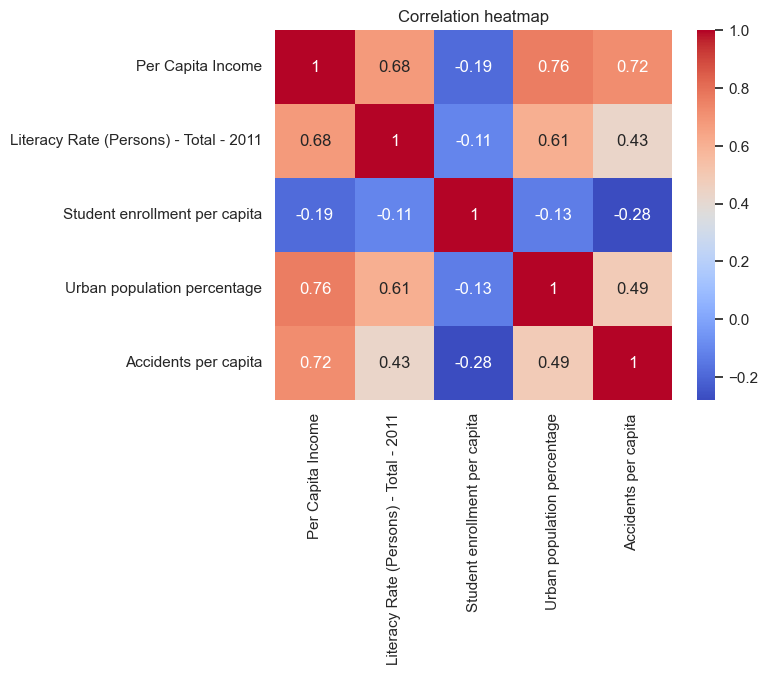

In [199]:
X_cols = ['Per Capita Income', 'Literacy Rate (Persons) - Total - 2011', 'Student enrollment per capita', 'Urban population percentage']
y_col = 'Accidents per capita'

X = df[X_cols]
y = df[y_col]

# Correlation heatmap
corr = df[X_cols + [y_col]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

Some interesting correlations!

Highest is between urban population % and per capita income - makes sense! More people in cities means more money.
Also see a high positive correlation between per capita income and accidents. Hmmm maybe because they buy more cars?


Student enrollment per capita has a negative correlation with accidents! Completely makes sense! Better education means less accidents....but literacy rate is negatively correlated with enrollment, so not sure.

In [200]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the features in X
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

X_normalized.head()

,Per Capita Income,Literacy Rate (Persons) - Total - 2011,Student enrollment per capita,Urban population percentage
0,0.475030,0.394318,-1.011994,0.767036
1,0.752672,0.663671,-0.520026,0.593438
2,-0.109846,-0.181116,-0.585227,0.235216
3,-0.246430,-1.209552,-2.719836,-0.050349
4,0.321550,2.096135,-0.705356,0.728978


In [201]:
import statsmodels.api as sm

# Add a constant column to the X matrix
X_normalized = sm.add_constant(X_normalized)

# Fit the linear regression model
model = sm.OLS(y, X_normalized)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Accidents per capita   R-squared:                       0.552
Model:                              OLS   Adj. R-squared:                  0.477
Method:                   Least Squares   F-statistic:                     7.383
Date:                  Wed, 14 Feb 2024   Prob (F-statistic):           0.000502
Time:                          00:28:49   Log-Likelihood:                -13.689
No. Observations:                    29   AIC:                             37.38
Df Residuals:                        24   BIC:                             44.21
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature in X
vif = pd.DataFrame()
vif["Feature"] = X_normalized.columns
vif["VIF"] = [variance_inflation_factor(X_normalized.values, i) for i in range(X_normalized.shape[1])]

vif

,Feature,VIF
0,const,1.000000
1,Per Capita Income,2.939711
2,Literacy Rate (Persons) - Total - 2011,1.912043
3,Student enrollment per capita,1.037456
4,Urban population percentage,2.491007


Results are not really as expected! I would've thought that a higher urban population % means more accidents.

Let's see what happens if we drop Income per capita.

In [206]:
# Fit the linear regression model without the Per Capita Income feature
model2 = sm.OLS(y, X_normalized.drop('Per Capita Income', axis=1))
results2 = model2.fit()

# Print the summary of the regression results
print(results2.summary())

                             OLS Regression Results                             
Dep. Variable:     Accidents per capita   R-squared:                       0.311
Model:                              OLS   Adj. R-squared:                  0.228
Method:                   Least Squares   F-statistic:                     3.760
Date:                  Wed, 14 Feb 2024   Prob (F-statistic):             0.0235
Time:                          00:36:30   Log-Likelihood:                -19.922
No. Observations:                    29   AIC:                             47.84
Df Residuals:                        25   BIC:                             53.31
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

The other features are still not significant, so the Per Capita Income really does help explain a lot...even though the 3 other features are probably correlated to it. Is it?

In [207]:
correlations = X_normalized.corrwith(X_normalized['Per Capita Income'])
correlations

const                                          NaN
Per Capita Income                         1.000000
Literacy Rate (Persons) - Total - 2011    0.675400
Student enrollment per capita            -0.187444
Urban population percentage               0.763391
dtype: float64

Okay, what if we have a model with just Per Capita Income?

In [209]:
# Fit the linear regression model without the Per Capita Income feature
model3 = sm.OLS(y, X_normalized[['const', 'Per Capita Income']])
results3 = model3.fit()

# Print the summary of the regression results
print(results3.summary())

                             OLS Regression Results                             
Dep. Variable:     Accidents per capita   R-squared:                       0.519
Model:                              OLS   Adj. R-squared:                  0.501
Method:                   Least Squares   F-statistic:                     29.09
Date:                  Wed, 14 Feb 2024   Prob (F-statistic):           1.06e-05
Time:                          00:39:17   Log-Likelihood:                -14.721
No. Observations:                    29   AIC:                             33.44
Df Residuals:                        27   BIC:                             36.18
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In [230]:
states_to_predict = ['Kerala', 'Tamil Nadu', 'Karnataka', 'Bihar']
X_test = df.loc[df['STATE/UT'].isin(states_to_predict)]
new_data_normalized = scaler.transform(X_test[X_cols])
new_data_normalized = pd.DataFrame(new_data_normalized, columns=X_cols)
new_data_normalized = sm.add_constant(new_data_normalized, has_constant='add')

# Make the prediction
prediction = results3.predict(new_data_normalized[['const', 'Per Capita Income']])

# Print the prediction
print(prediction)

0    0.653022
1    0.408988
2    0.588984
3   -0.136106
dtype: float64


In [231]:
df.loc[df['STATE/UT'].isin(states_to_predict), ['STATE/UT', y_col]]

,STATE/UT,Accidents per capita
0,Tamil Nadu,0.913039
2,Karnataka,0.731582
4,Kerala,1.054182
12,Bihar,0.089866
